In [10]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

In [2]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

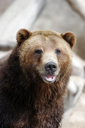

In [7]:
img = PILImage.create(btn_upload.data[-1])
img.to_thumb(128, 128)

In [12]:
path = Path(".models")
learn_inf = load_learner(path/'export.pkl')

In [13]:
pred,pred_idx,probs = learn_inf.predict(img)

In [17]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9991')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

NameError: name 'out_pl' is not defined

In [16]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [19]:
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])
     

In [22]:
!jupyter server extension enable --sys-prefix voila

Extension package jupyterlab took 0.1362s to import
Extension package voila.server_extension took 0.1961s to import
Enabling: voila
- Writing config: /home/rajesh/sw/miniconda3/etc/jupyter
    - Validating voila...
      voila  OK
    - Extension successfully enabled.
